In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# SKlearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report

# Keras libraries

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense

In [42]:
data=pd.read_csv('Molecular_Activity.txt',sep='\t')

In [43]:
data.head()

,prop_1,prop_2,prop_3,prop_4,Activity
0,4.06,71.01,57.2,5.82,1
1,3.63,65.62,52.68,5.44,1
2,3.63,68.90,58.29,6.06,1
3,4.11,75.59,62.81,6.44,1
4,4.00,70.86,58.05,6.06,1


# Basic Data Checks

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   prop_1    540 non-null    float64
 1   prop_2    540 non-null    float64
 2   prop_3    540 non-null    object 
 3   prop_4    540 non-null    float64
 4   Activity  540 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 21.2+ KB


In [45]:
data.describe()

,prop_1,prop_2,prop_4,Activity
count,540.000000,540.000000,540.000000,540.000000
mean,4.087454,65.960121,4.984520,0.683333
std,1.356507,14.918107,1.709397,0.465608
min,1.792560,41.810880,1.620288,0.000000
25%,2.986700,54.330760,4.304450,0.000000
50%,3.939100,63.727060,5.252841,1.000000
75%,5.018780,75.008000,5.969100,1.000000
max,7.770000,115.848000,10.020000,1.000000


In [46]:
data.Activity.value_counts()

1    369
0    171
Name: Activity, dtype: int64

In [47]:
data['prop_3']=pd.to_numeric(data['prop_3'],errors='coerce')
data.dropna(inplace=True)

In [48]:
data.isna().sum()

prop_1      0
prop_2      0
prop_3      0
prop_4      0
Activity    0
dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 539
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   prop_1    539 non-null    float64
 1   prop_2    539 non-null    float64
 2   prop_3    539 non-null    float64
 3   prop_4    539 non-null    float64
 4   Activity  539 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 25.3 KB


In [50]:
import seaborn as sns

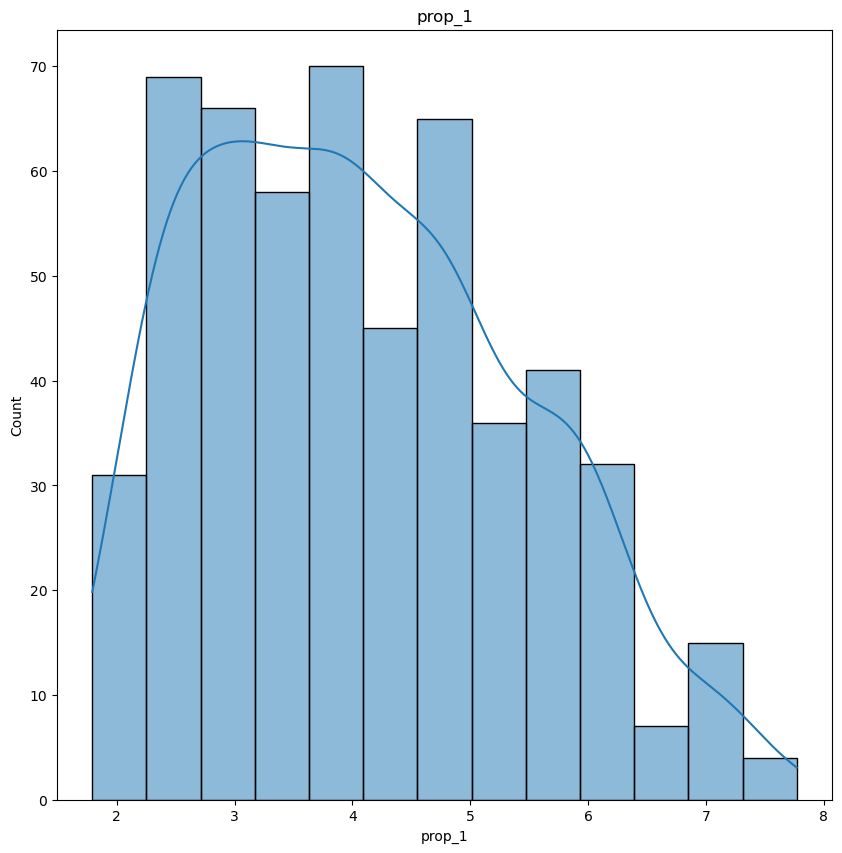

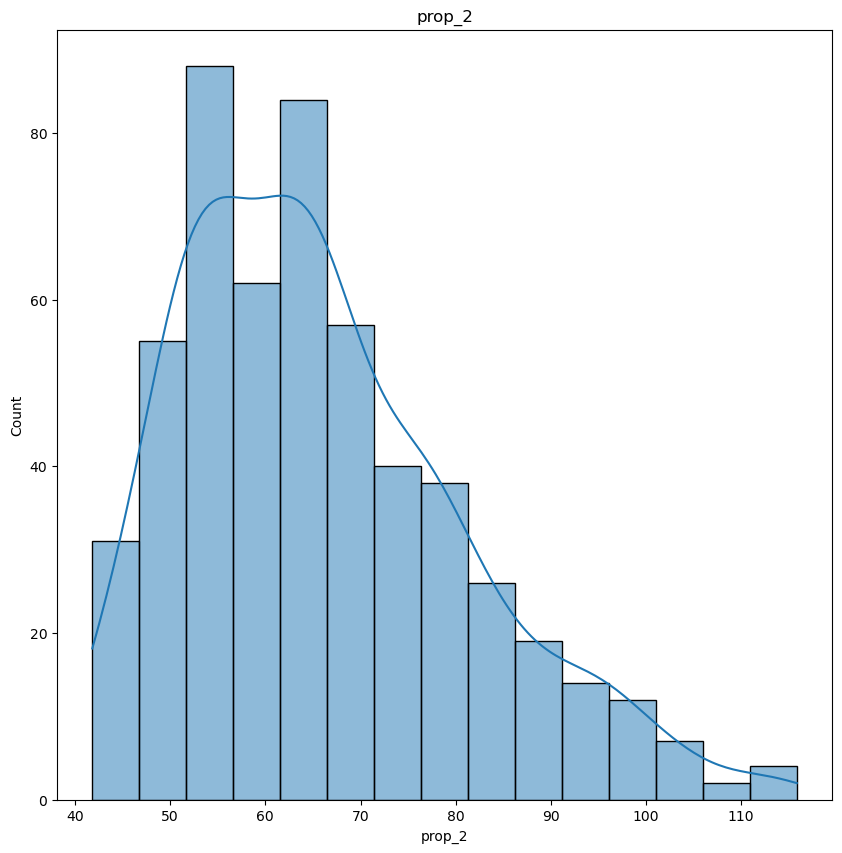

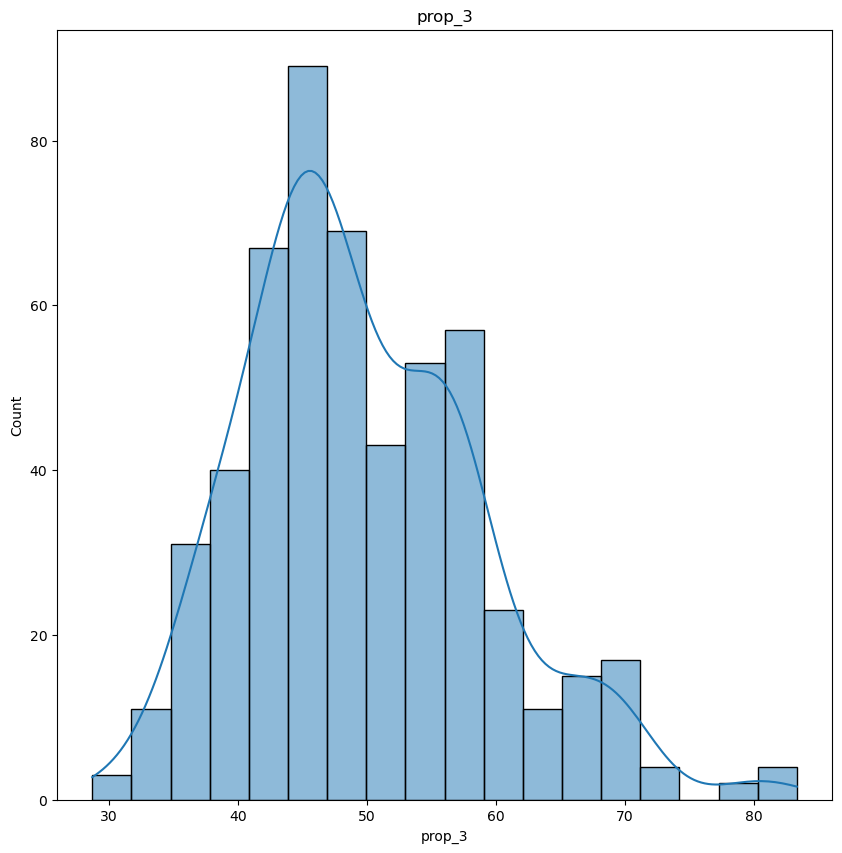

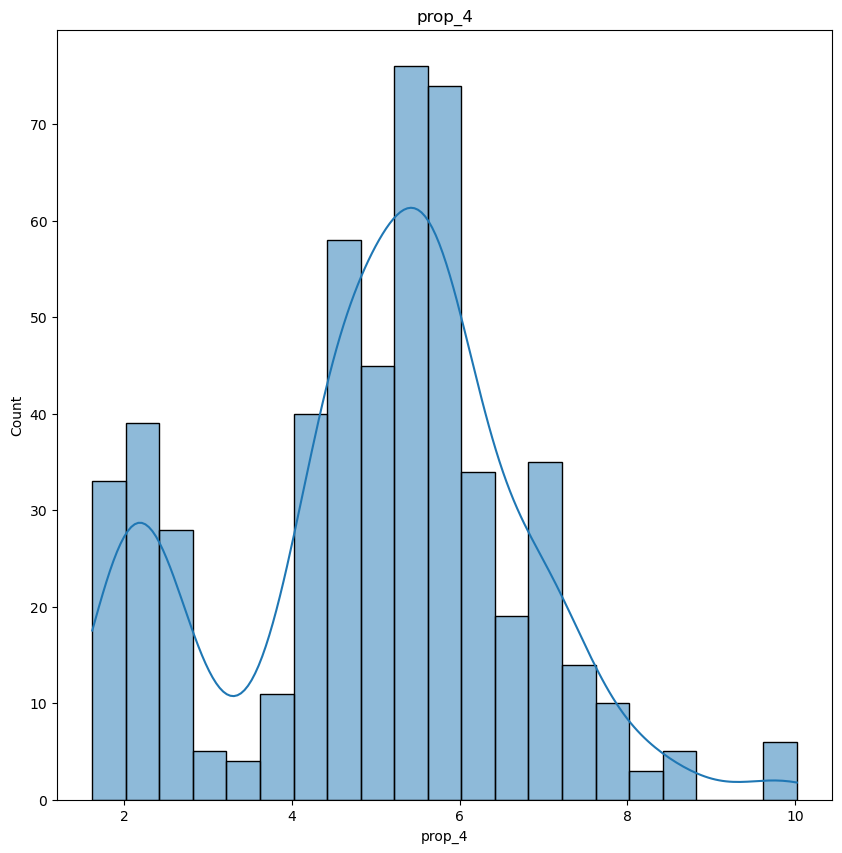

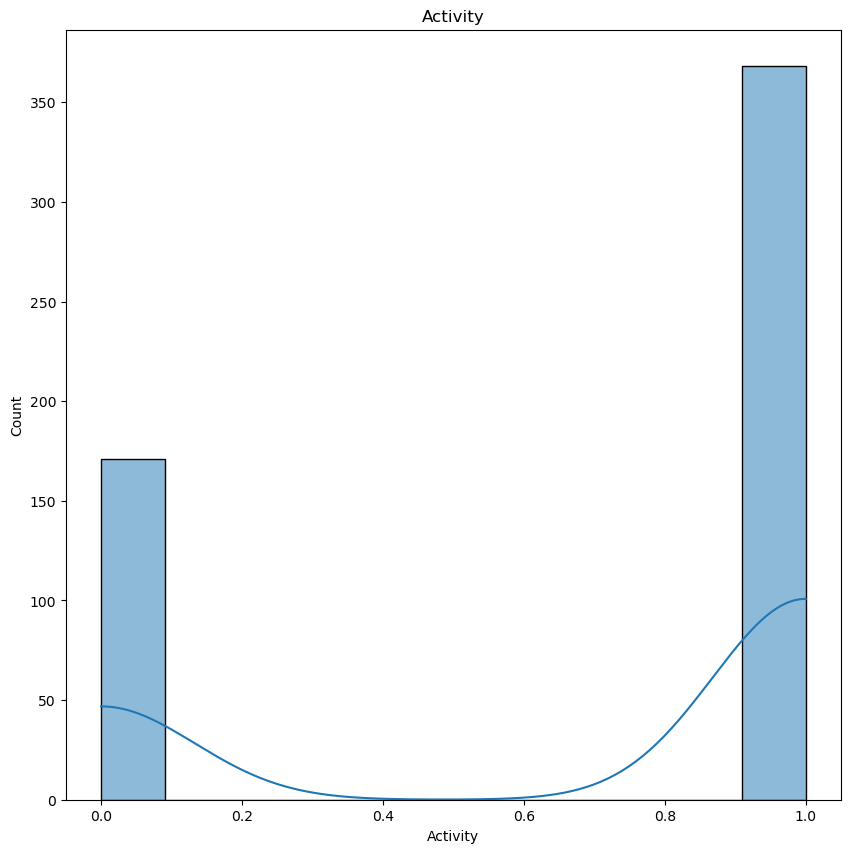

In [51]:
for column in data.columns:
    plt.figure(figsize=(10,10))
    sns.histplot(data[column],kde=True)
    
    plt.title(column)
    #plt.legend()
    plt.show()

<Axes: >

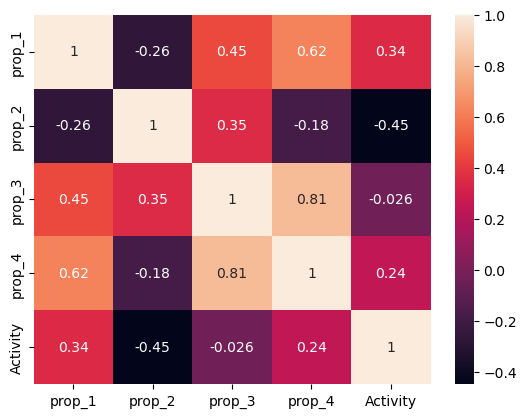

In [52]:
sns.heatmap(data.corr(),annot=True)

In [53]:
x=data.drop('Activity',axis=1)
y=data['Activity']


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123)
y_train.value_counts()

1    279
0    125
Name: Activity, dtype: int64

In [55]:
rus=RandomUnderSampler()
x_rus,y_rus=rus.fit_resample(x_train,y_train)


In [56]:
y_rus.value_counts()

0    125
1    125
Name: Activity, dtype: int64

In [57]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_rus)
x_test_scaled=scaler.transform(x_test)

# Modelling with optimizer='SGD',loss=`binary_crossentropy`,activation='relu', hidden_layers=2(16,5)

In [58]:
model=Sequential()

model.add(Dense(20,activation='relu'))

model.add(Dense(16,activation='relu'))

model.add(Dense(5,activation='relu'))

model.add(Dense(1,activation='sigmoid'))



model.compile(optimizer='sgd',
              loss='binary_crossentropy',
             metrics='accuracy')


history=model.fit(x_train_scaled,y_rus,validation_data=(x_test_scaled,y_test),epochs=200,verbose=1,batch_size=1)

accuracy_score=model.evaluate(x_train_scaled,y_rus)
test_score=model.evaluate(x_test_scaled,y_test)


Epoch 1/200
250/250 [==============================] - 1s 4ms/step - loss: 0.6054 - accuracy: 0.7000 - val_loss: 0.5845 - val_accuracy: 0.6148
Epoch 2/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5366 - accuracy: 0.7280 - val_loss: 0.5413 - val_accuracy: 0.7407
Epoch 3/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5089 - accuracy: 0.7520 - val_loss: 0.5288 - val_accuracy: 0.7630
Epoch 4/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5042 - accuracy: 0.7440 - val_loss: 0.5188 - val_accuracy: 0.7852
Epoch 5/200
250/250 [==============================] - 1s 3ms/step - loss: 0.4921 - accuracy: 0.7720 - val_loss: 0.5156 - val_accuracy: 0.7704
Epoch 6/200
250/250 [==============================] - 1s 3ms/step - loss: 0.4827 - accuracy: 0.7840 - val_loss: 0.5169 - val_accuracy: 0.7852
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 0.4698 - accuracy: 0.8080 - val_loss: 0.5180 - val_accuracy: 0.7630

In [59]:
test_score=model.evaluate(x_test_scaled,y_test)
print(f' THe training accuracy is {accuracy_score[1]*100:.2f} and testing score {test_score[1]*100:.2f}')

5/5 [==============================] - 0s 3ms/step - loss: 0.3983 - accuracy: 0.8963
 THe training accuracy is 96.00 and testing score 89.63


In [60]:
# Plotting the loss and accuracy plots
def Plot_the_performance(history):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    
    accuracy_train_score=np.array(history.history['accuracy'])*100
    accuracy_test_score=np.array(history.history['val_accuracy'])*100
    x=range(1,len(accuracy_train_score)+1)
    plt.plot(x,accuracy_train_score,label="Training accuracy score (%)")
    plt.plot(x,accuracy_test_score,label="Testing accuracy score (%)",color='r')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy score")
    plt.grid(True)
    plt.legend()
    
    
    plt.subplot(1,2,2)
    train_loss=history.history['loss']
    test_loss=history.history['val_loss']
    plt.plot(x,train_loss,color='b',label='Training_loss')
    plt.plot(x,test_loss,color='r',label="Testing_loss")
    plt.xlabel("Epochs")
    plt.ylabel("Training and testing loss")
    plt.grid(True)
    plt.legend()
    plt.show()

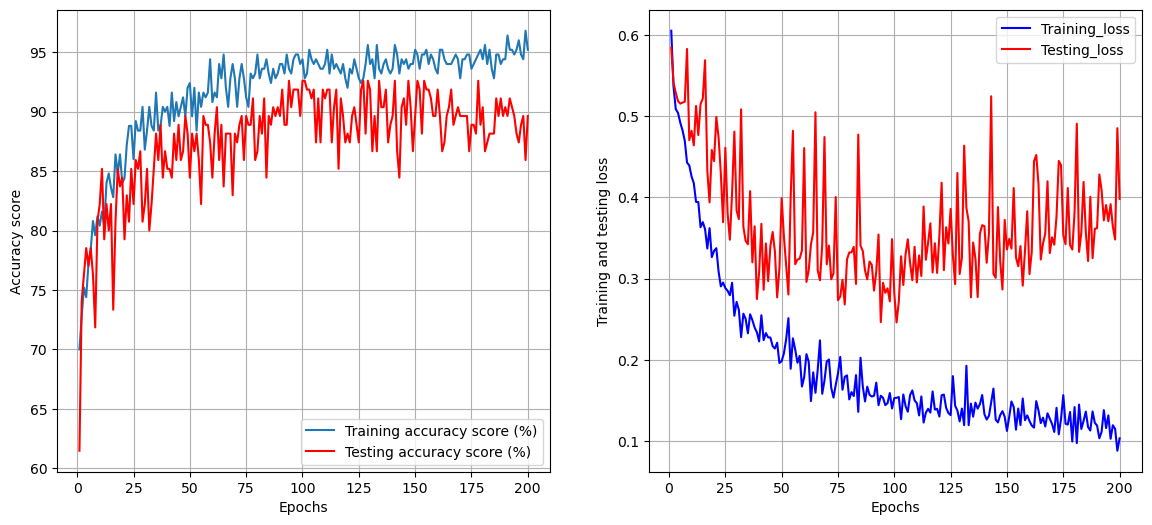

In [61]:
Plot_the_performance(history)

# Model 2: Optimizer = adam, hidden layers = 2 (16,5), loss = binary cross entropy, activation = relu

In [62]:
model2=Sequential()

model2.add(Dense(20,activation='relu'))

model2.add(Dense(16,activation='relu'))

model2.add(Dense(5,activation='relu'))

model2.add(Dense(1,activation='sigmoid'))



model2.compile(optimizer='adam',
              loss='binary_crossentropy',
             metrics='accuracy')


history2=model2.fit(x_train_scaled,y_rus,validation_data=(x_test_scaled,y_test),epochs=200,verbose=1,batch_size=1)

accuracy_score=model2.evaluate(x_train_scaled,y_rus)
test_score=model2.evaluate(x_test_scaled,y_test)

Epoch 1/200
250/250 [==============================] - 2s 4ms/step - loss: 0.6375 - accuracy: 0.6680 - val_loss: 0.5976 - val_accuracy: 0.7333
Epoch 2/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5493 - accuracy: 0.7320 - val_loss: 0.5348 - val_accuracy: 0.7630
Epoch 3/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5177 - accuracy: 0.7480 - val_loss: 0.5392 - val_accuracy: 0.7630
Epoch 4/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5017 - accuracy: 0.7480 - val_loss: 0.5163 - val_accuracy: 0.7852
Epoch 5/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4854 - accuracy: 0.7840 - val_loss: 0.4898 - val_accuracy: 0.8148
Epoch 6/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4726 - accuracy: 0.8080 - val_loss: 0.5281 - val_accuracy: 0.7407
Epoch 7/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4614 - accuracy: 0.8200 - val_loss: 0.5100 - val_accuracy: 0.7926

5/5 [==============================] - 0s 4ms/step - loss: 0.4294 - accuracy: 0.9111
 THe training accuracy is 96.80 and testing score 91.11


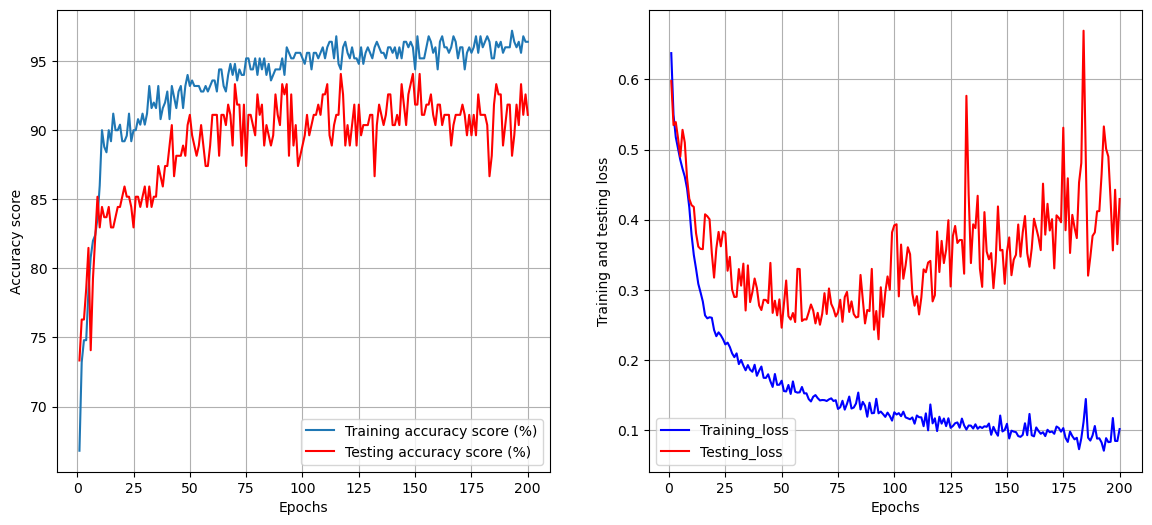

In [63]:
test_score=model2.evaluate(x_test_scaled,y_test)
print(f' THe training accuracy is {accuracy_score[1]*100:.2f} and testing score {test_score[1]*100:.2f}')
Plot_the_performance(history2)

In [64]:
# Model 3 : Optimizer=adam, hidden_layers=3(30,20,10), loss=

In [65]:
model3=Sequential()

model3.add(Dense(50,activation='relu'))

model3.add(Dense(30,activation='relu'))

model3.add(Dense(20,activation='relu'))

model3.add(Dense(10,activation='relu'))

model3.add(Dense(1,activation='sigmoid'))



model3.compile(optimizer='adam',
              loss='binary_crossentropy',
             metrics='accuracy')


history3=model3.fit(x_train_scaled,y_rus,validation_data=(x_test_scaled,y_test),epochs=200,verbose=1,batch_size=1)

accuracy_score=model3.evaluate(x_train_scaled,y_rus)
test_score=model3.evaluate(x_test_scaled,y_test)

Epoch 1/200
250/250 [==============================] - 2s 5ms/step - loss: 0.5939 - accuracy: 0.6480 - val_loss: 0.5812 - val_accuracy: 0.7852
Epoch 2/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5013 - accuracy: 0.7640 - val_loss: 0.5259 - val_accuracy: 0.7704
Epoch 3/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4761 - accuracy: 0.8040 - val_loss: 0.4938 - val_accuracy: 0.7926
Epoch 4/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4219 - accuracy: 0.8400 - val_loss: 0.5622 - val_accuracy: 0.7556
Epoch 5/200
250/250 [==============================] - 1s 4ms/step - loss: 0.3927 - accuracy: 0.8320 - val_loss: 0.4339 - val_accuracy: 0.8370
Epoch 6/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3443 - accuracy: 0.8760 - val_loss: 0.4275 - val_accuracy: 0.8296
Epoch 7/200
250/250 [==============================] - 1s 4ms/step - loss: 0.2975 - accuracy: 0.8760 - val_loss: 0.4633 - val_accuracy: 0.8519

5/5 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.8889
 THe training accuracy is 95.20 and testing score 88.89


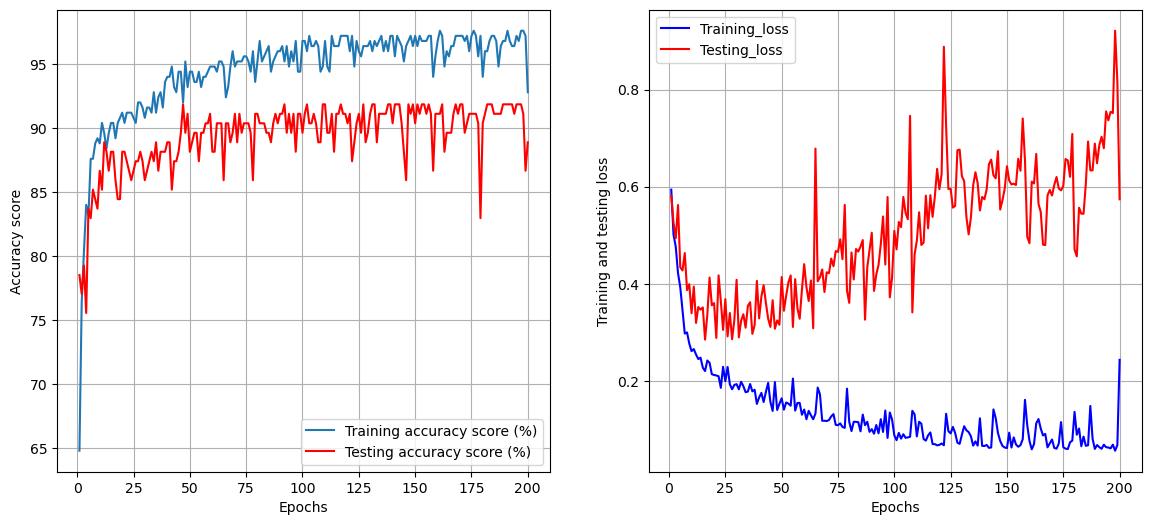

In [66]:
test_score=model3.evaluate(x_test_scaled,y_test)
print(f' THe training accuracy is {accuracy_score[1]*100:.2f} and testing score {test_score[1]*100:.2f}')
Plot_the_performance(history3)

# Adding L2 Regularization to see if there is any improvement, Optimizer=`Adam`

In [67]:
model4=keras.models.Sequential([
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(30,activation='relu',kernel_regularizer=keras.regularizers.l2(l2=0.05)),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model4.compile(optimizer='adam',
              loss='binary_crossentropy',
             metrics='accuracy')
history4=model4.fit(x_train_scaled,y_rus,validation_data=(x_test_scaled,y_test),epochs=200,verbose=1,batch_size=1)

Epoch 1/200
250/250 [==============================] - 2s 4ms/step - loss: 1.3591 - accuracy: 0.6360 - val_loss: 0.8186 - val_accuracy: 0.7259
Epoch 2/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6604 - accuracy: 0.7320 - val_loss: 0.6296 - val_accuracy: 0.8222
Epoch 3/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5799 - accuracy: 0.7320 - val_loss: 0.5887 - val_accuracy: 0.8370
Epoch 4/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5535 - accuracy: 0.7600 - val_loss: 0.5582 - val_accuracy: 0.8000
Epoch 5/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5353 - accuracy: 0.7600 - val_loss: 0.5849 - val_accuracy: 0.8444
Epoch 6/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5322 - accuracy: 0.7640 - val_loss: 0.5543 - val_accuracy: 0.8444
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5112 - accuracy: 0.7960 - val_loss: 0.5699 - val_accuracy: 0.7630

5/5 [==============================] - 0s 6ms/step - loss: 0.3476 - accuracy: 0.9111
 THe training accuracy is 95.20 and testing score 91.11


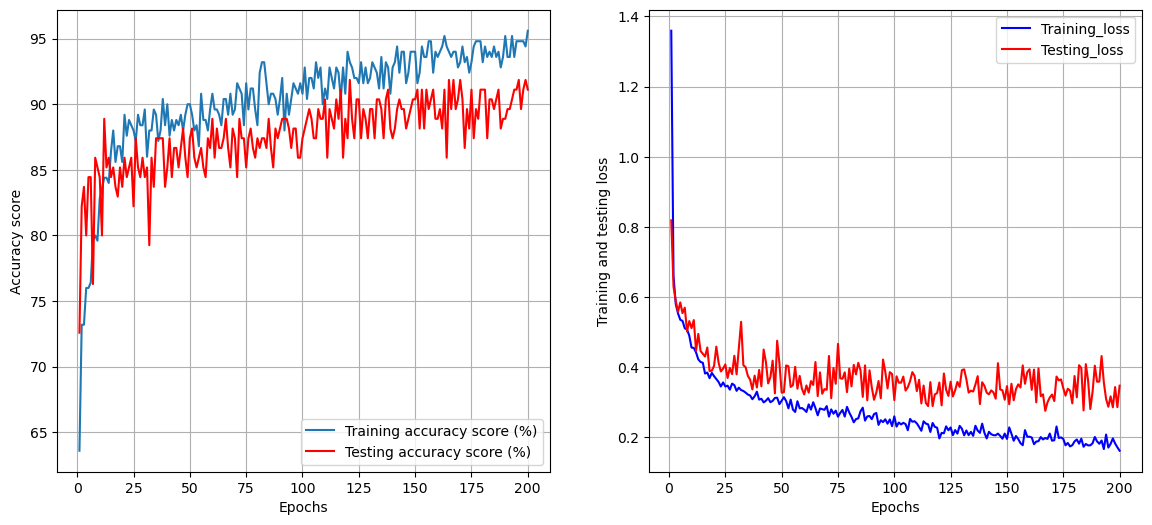

In [68]:
test_score=model4.evaluate(x_test_scaled,y_test)
print(f' THe training accuracy is {accuracy_score[1]*100:.2f} and testing score {test_score[1]*100:.2f}')
Plot_the_performance(history4)

In [69]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 50)                250       
                                                                 
 dense_26 (Dense)            (None, 30)                1530      
                                                                 
 dense_27 (Dense)            (None, 10)                310       
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2101 (8.21 KB)
Trainable params: 2101 (8.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
250/250 [==============================] - 2s 4ms/step - loss: 9.8412 - accuracy: 0.6600 - val_loss: 1.3258 - val_accuracy: 0.7556
Epoch 2/200
250/250 [==============================] - 1s 3ms/step - loss: 0.7633 - accuracy: 0.6960 - val_loss: 0.6866 - val_accuracy: 0.7852
Epoch 3/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6708 - accuracy: 0.7000 - val_loss: 0.6442 - val_accuracy: 0.7852
Epoch 4/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6557 - accuracy: 0.7280 - val_loss: 0.6525 - val_accuracy: 0.8296
Epoch 5/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6471 - accuracy: 0.7120 - val_loss: 0.6485 - val_accuracy: 0.7852
Epoch 6/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6526 - accuracy: 0.7320 - val_loss: 0.6051 - val_accuracy: 0.7852
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6178 - accuracy: 0.7520 - val_loss: 0.7167 - val_accuracy: 0.7111

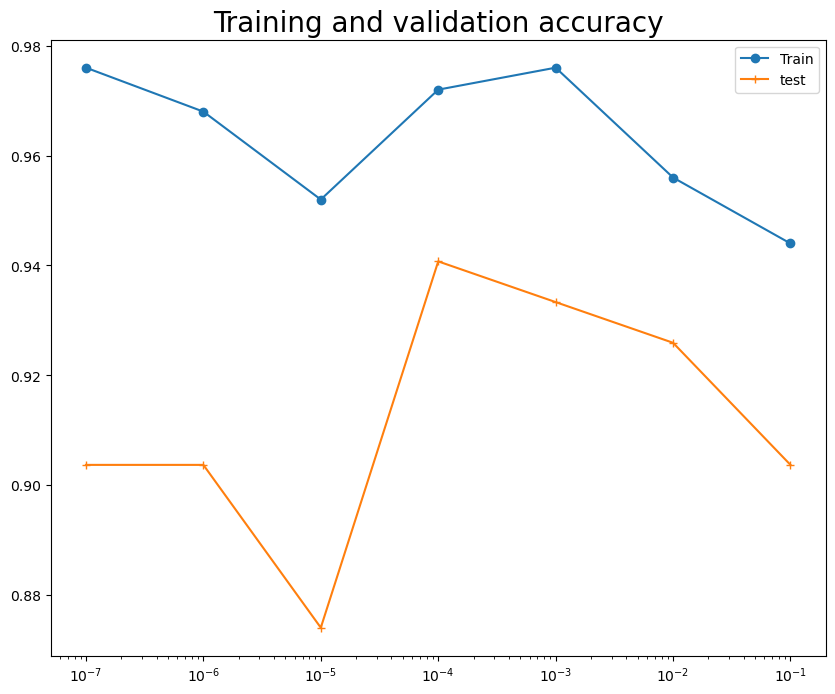

In [71]:
# Expermenting model 3 with both l1 and L2 regularization with multiple vales
values=[1e-01,1e-02,1e-03,1e-04,1e-05,1e-06,1e-07]
train,test=[],[]
for params in values:
    model5=Sequential()
    model5.add(Dense(50,activation='relu'))
    model5.add(Dense(30,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(params,params)))
    model5.add(Dense(20,activation='relu'))
    model5.add(Dense(10,activation='relu'))
    model5.add(Dense(1,activation='sigmoid'))
    
    model5.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
    
    model5.fit(x_train_scaled,y_rus,validation_data=(x_test_scaled,y_test),epochs=200,verbose=1,batch_size=1)
    
    train_acc=model5.evaluate(x_train_scaled,y_rus)[1]
    test_acc=model5.evaluate(x_test_scaled,y_test)[1]
    train.append(train_acc)
    test.append(test_acc)
    
# Plot train and test
plt.figure(figsize=(10,8))
plt.semilogx(values,train,label='Train',marker='o')
plt.semilogx(values,test,label="test",marker='+')
plt.title("Training and validation accuracy",fontsize=20)
plt.legend()
plt.show()
    
    